# 1. Introduction:

In the fast-paced and dynamic world of financial markets, making informed decisions about stock investments is a challenging task. Investors are inundated with an abundance of information, from historical stock performance data to real-time market news and sentiment. With passionate about finance and technology, we recognize the need for a sophisticated tool that can assist investors in navigating this complex landscape.

The objective of this project is to develop a robust and data-driven stock recommendation system that leverages historical stock data and additional information from the Nasdaq stock exchange. Through the utilization of machine learning and statistical analysis techniques, our aim is to provide investors with personalized stocks and recommend whether to trade or not to achieve the highest gain, enabling them to make informed decisions in their investment endeavors. Additionally, we aim to combining multiple feature selection methods to enhance the performance of our recommendations.
Our project revolves around the development of a stock recommendation system, a solution that merges cutting-edge technology with comprehensive financial data. We have access to a rich dataset that combines historical stock data sourced from Kaggle with additional insights from the Nasdaq stock exchange. This dataset encompasses a wide range of stocks across different sectors and industries, providing a fertile ground for analysis and recommendation generation.

Our primary aim is to create a user-friendly, data-driven platform that caters to investors with varying levels of experience and interests. By leveraging machine learning algorithms, extracting  features and model architecture  are  the  two  most  significant tasks  in  stock  trading  when  employing  machine  learning  approaches  to  obtain long-term  benefits. Furthermore, we plan to incorporate sentiment analysis to gauge market sentiment and factor it into our recommendations (if time allowed), recognizing the significance of market psychology in stock trading decisions.

Throughout this journey, we will employ data preprocessing, feature engineering, model building and optimization
to ensure the accuracy and reliability of our recommendations.

# 2. Data Acquisition and Preparation:

## 2.1. Import library:

In [1]:
import os, sys
import requests
import glob
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pyspark.sql import SparkSession
from datetime import datetime, date
import string
import re
import ta

## 2.2. Data Sources:

* Historical Stock Price Data: This dataset contains historical stock price information, including open, close, high, low prices, and trading volumes. We retrieve real time, historical and technical indicators financial data providers such as Kaggle Huge Dataset.

* Sector and Industry Information: Stocks within the same sector or industry often move together. Data on sectors and industries can be obtained from NASDAQ.

* Market Index Data: Data on major market indices NASDAQ can be useful for benchmarking and analyzing stock performance relative to broader market trends.

* News and Social Media Data (if time permits): News articles, social media sentiment, and market news can influence stock prices. Accessing APIs or scraping news articles and social media platforms can provide valuable sentiment data.

### 2.2.1. NASDAQ Data Retrieval:

In [2]:
# Read cvs file to Dataframe 
ticker_df = pd.read_csv("//Users//marianivethaantonypushparaj//Downloads//nasdaq_ticker_symbols.csv").reset_index(drop=True)
ticker_df.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.7400,-2.436%,3.210560e+10,United States,1999.0,1327712,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$27.87,-1.5100,-5.14%,4.973390e+09,United States,2016.0,5487549,Industrials,Aluminum
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.74,0.0000,0.00%,7.582898e+08,NaN,2021.0,11880,Industrials,Metal Fabrications
3,AACG,ATA Creativity Global American Depositary Shares,$1.1435,-0.0165,-1.422%,3.615995e+07,China,2008.0,1424,Consumer Discretionary,Educational Services
4,AACI,Armada Acquisition Corp. I Common Stock,$10.70,0.0000,0.00%,0.000000e+00,United States,2021.0,199,Finance,Blank Checks


### 2.2.2. Historical Stocks Data: 

In [ ]:
# Define the directory where your CSV files are located
folder_path = 'Dataset//Stocks'

# Initialize an empty DataFrame to store the concatenated data
stock_df = []

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".us.txt"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
        
        # Extract the stock symbol from the file name
        stock_ticker = filename.split(".")[0].upper()
        
        # Add a "stock" column with the stock symbol
        df['Ticker'] = stock_ticker
        
        # Drop the first row 
        df = df.iloc[1:]
        
        # Append the DataFrame to the concatenated_data DataFrame
        stock_df.append(df)
        print("Finished processing", filename)

# Save the concatenated data to a new CSV file
stock_df = pd.concat(stock_df, ignore_index=True)

In [ ]:
# Sort the DataFrame based on the 'Ticker' column
stock_df.sort_values(by='Ticker', inplace=True)

# Save the sorted data to a new CSV file
stock_df.to_csv('//Users//vanle//Downloads//stock_sorted.csv', index=False)

In [3]:
merged_df = pd.read_csv("//Users//marianivethaantonypushparaj//Downloads//stock_sorted.csv").reset_index(drop=True)

In [4]:
# Merge 2 dataframes using an inner join on the 'Ticker' column
merged_df = pd.merge(merged_df, ticker_df, left_on='Ticker', right_on='Symbol', how='inner')

# Drop the duplicate 'Ticker' column 
merged_df.drop(columns=['Symbol'], inplace=True)

# Drop the 'Volume_x' column
merged_df.drop(columns=['Volume_y'], inplace=True)

# Rename the 'Volume_y' column to 'Volume'
merged_df.rename(columns={'Volume_x': 'Volume'}, inplace=True)
merged_df

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Sector,Industry
0,2002-09-26,9.532,9.653,9.0989,9.3011,4411597,0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.74,-2.436%,3.210560e+10,United States,1999.0,Industrials,Electrical Products
1,2013-10-14,35.186,35.344,34.7120,35.2950,3071025,0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.74,-2.436%,3.210560e+10,United States,1999.0,Industrials,Electrical Products
2,2013-10-11,34.966,35.509,34.8150,35.3650,2183984,0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.74,-2.436%,3.210560e+10,United States,1999.0,Industrials,Electrical Products
3,2013-10-10,34.561,35.186,34.5610,35.0420,3530542,0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.74,-2.436%,3.210560e+10,United States,1999.0,Industrials,Electrical Products
4,2013-10-09,34.521,34.623,33.9410,34.3250,3536792,0,A,Agilent Technologies Inc. Common Stock,$109.73,-2.74,-2.436%,3.210560e+10,United States,1999.0,Industrials,Electrical Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907894,2015-12-10,13.110,13.270,12.7600,13.2200,73800,0,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.34,-0.01,-0.741%,7.227884e+07,United States,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations
9907895,2015-12-11,12.990,13.430,12.7600,13.1900,72500,0,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.34,-0.01,-0.741%,7.227884e+07,United States,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations
9907896,2015-12-14,13.260,13.650,12.9300,13.3700,77608,0,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.34,-0.01,-0.741%,7.227884e+07,United States,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations
9907897,2015-12-04,13.040,13.360,12.8500,12.9600,48500,0,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.34,-0.01,-0.741%,7.227884e+07,United States,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations


## 2.3. Exploratory Data Analysis:

### 2.3.1. Data Cleaning

In [5]:
merged_df['OpenInt'].nunique()

1

In [6]:
# Drop 'OpenInt' and 'IPO Year' column since it has no contribution in our data
merged_df = merged_df.drop(['OpenInt'], axis=1)

In [7]:
# Remove duplicate rows
merged_df=merged_df.drop_duplicates(subset=['Open', 'High', 'Low', 'Close','Volume'], keep='last')

In [8]:
# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [9]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Ticker              0
Name                0
Last Sale           0
Net Change          0
% Change            0
Market Cap          0
Country         82472
IPO Year      5788248
Sector         163217
Industry       163217
dtype: int64


In [10]:
# Fill NaN values in these column: 'Country', 'Sector', 'Industry'  with 'Other'
merged_df[['Country', 'Sector', 'Industry']] = merged_df[['Country', 'Sector', 'Industry']].fillna('Other')

In [11]:
merged_df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Ticker                object
Name                  object
Last Sale             object
Net Change           float64
% Change              object
Market Cap           float64
Country               object
IPO Year             float64
Sector                object
Industry              object
dtype: object

In [12]:
# Convert 'Open', 'High', 'Low', 'Close', 'Last Sale' columns to float
merged_df['Open'] = merged_df['Open'].astype(str).str.replace('$', '').astype(float)
merged_df['High'] = merged_df['High'].astype(str).str.replace('$', '').astype(float)
merged_df['Low'] = merged_df['Low'].astype(str).str.replace('$', '').astype(float)
merged_df['Close'] = merged_df['Close'].astype(str).str.replace('$', '').astype(float)
merged_df['Last Sale'] = merged_df['Last Sale'].astype(str).str.replace('$', '').astype(float)

/var/folders/28/gj9cb4w95rb4sbjdp44jc_hh0000gn/T/ipykernel_49949/2012323266.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['Open'] = merged_df['Open'].astype(str).str.replace('$', '').astype(float)
/var/folders/28/gj9cb4w95rb4sbjdp44jc_hh0000gn/T/ipykernel_49949/2012323266.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['High'] = merged_df['High'].astype(str).str.replace('$', '').astype(float)
/var/folders/28/gj9cb4w95rb4sbjdp44jc_hh0000gn/T/ipykernel_49949/2012323266.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal

In [21]:
merged_df.head()

,index,Date,Open,High,Low,Close,Volume,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Sector,Industry,Volume change
0,1738,1999-11-18,30.713,33.754,27.002,29.702,66277506,A,Agilent Technologies Inc. Common Stock,109.73,-2.74,-2.436,3.210560e+10,United States,1999.0,Industrials,Electrical Products,NaN
1,1739,1999-11-19,28.986,29.027,26.872,27.257,16142920,A,Agilent Technologies Inc. Common Stock,109.73,-2.74,-2.436,3.210560e+10,United States,1999.0,Industrials,Electrical Products,-75.643441
2,1740,1999-11-22,27.886,29.702,27.044,29.702,6970266,A,Agilent Technologies Inc. Common Stock,109.73,-2.74,-2.436,3.210560e+10,United States,1999.0,Industrials,Electrical Products,-56.821529
3,1741,1999-11-23,28.688,29.446,27.002,27.002,6332082,A,Agilent Technologies Inc. Common Stock,109.73,-2.74,-2.436,3.210560e+10,United States,1999.0,Industrials,Electrical Products,-9.155806
4,1742,1999-11-24,27.083,28.309,27.002,27.717,5132147,A,Agilent Technologies Inc. Common Stock,109.73,-2.74,-2.436,3.210560e+10,United States,1999.0,Industrials,Electrical Products,-18.950086


In [13]:
# Convert 'Volume' column to integer (remove commas)
merged_df['Volume'] = merged_df['Volume'].astype(str).str.replace(',', '').astype(int)

In [14]:
# Convert '% Change' column to float, remove '%' and handle missing values
merged_df['% Change'] = merged_df['% Change'].astype(str).str.replace('%', '')
merged_df['% Change'] = pd.to_numeric(merged_df['% Change'], errors='coerce')

In [15]:
#Arranging the companies based on Date
merged_df = merged_df.sort_values(['Ticker','Date']).reset_index()

In [16]:
merged_df['Volume change'] = merged_df['Volume'].pct_change() * 100

In [17]:
#Finding largest values of volume column
comp_volume = merged_df.groupby('Name')['Volume'].sum()
comp_volume.nlargest(10)
comp_volume = pd.DataFrame(comp_volume)
comp_volume = comp_volume.reset_index()

In [18]:
comp_volume

,Name,Volume
0,1-800-FLOWERS.COM Inc. Common Stock,712477135
1,180 Degree Capital Corp. Common Stock,413647204
2,1st Source Corporation Common Stock,146353743
3,22nd Century Group Inc. Common Stock,915648427
4,2U Inc. Common Stock,382375889
...,...,...
3605,lululemon athletica inc. Common Stock,6784141430
3606,trivago N.V. American Depositary Shares,300599961
3607,uniQure N.V. Ordinary Shares,234784024
3608,vTv Therapeutics Inc. Class A Common Stock,29681245


In [19]:
#Dropping the data of those companies because if it shows infinity or o
for i in range(0,len(comp_volume)):
    if comp_volume['Volume'][i]=='inf' or comp_volume['Volume'][i]<=0:
        merged_df=merged_df.drop(merged_df[merged_df['Name'] == comp_volume['Name'][i]].index)

In [20]:
#Checking if any outliers in Open,High,Low and Close as price cant be negative or 0
merged_df = merged_df.drop(merged_df[merged_df['Open'] <=0].index)
merged_df = merged_df.drop(merged_df[merged_df['High'] <=0].index)
merged_df = merged_df.drop(merged_df[merged_df['Low'] <=0].index)
merged_df = merged_df.drop(merged_df[merged_df['Close'] <=0].index)
merged_df = merged_df.drop(merged_df[merged_df['Last Sale'] <=0].index)

### 2.3.2. EDA

#### Sector and Industry Breakdown of Company Data

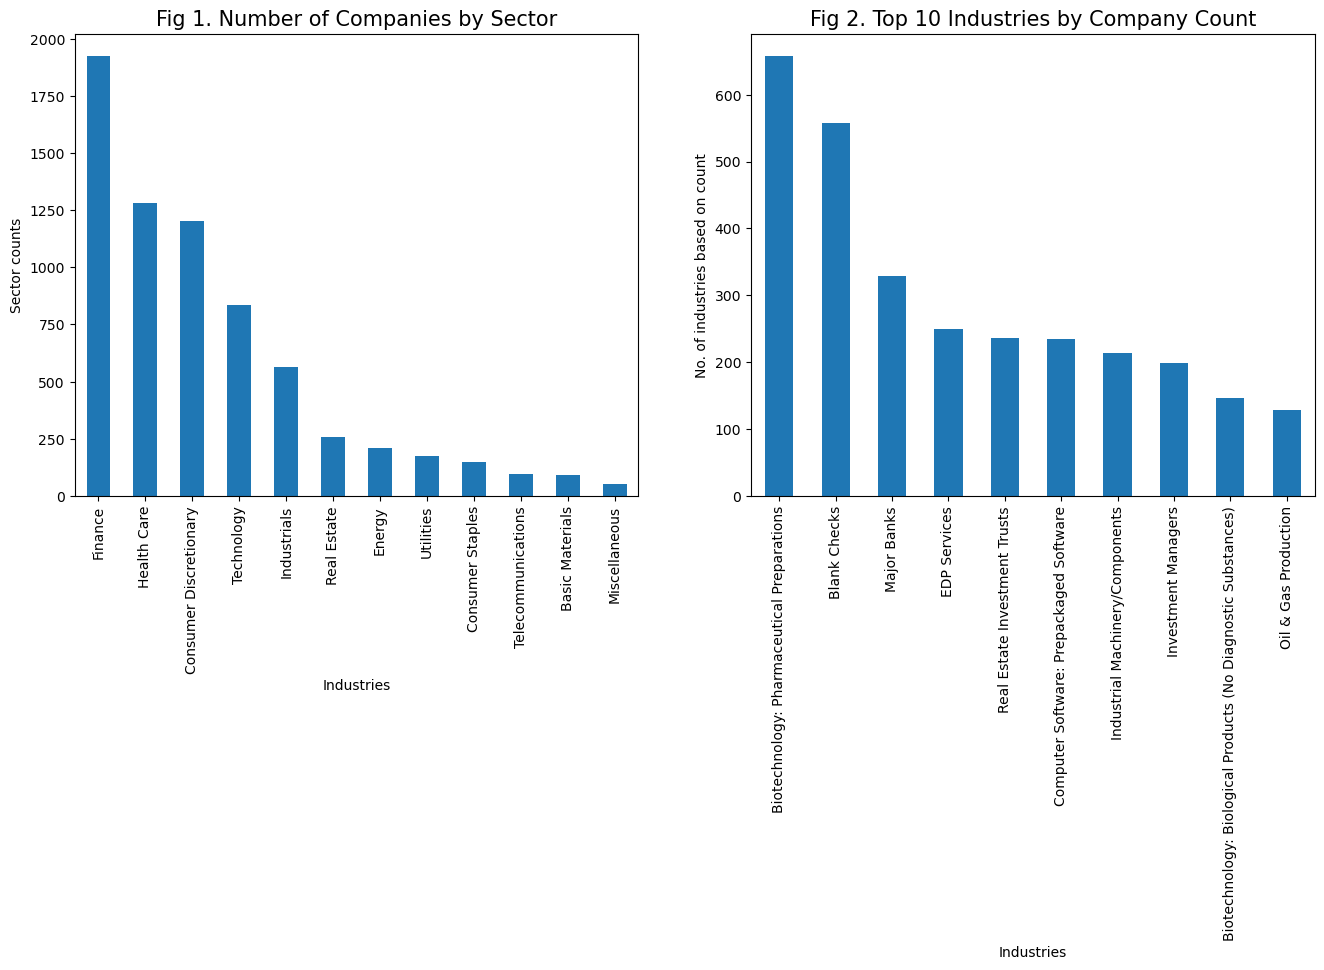

In [22]:
# Sector and Industry Analysis
sector_counts = ticker_df['Sector'].value_counts()
industry_counts = ticker_df['Industry'].value_counts()

# Plot the histogram of company sectors and industries 
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sector_counts.plot(kind='bar')
plt.title('Fig 1. Number of Companies by Sector', fontsize=15)
plt.ylabel('Sector counts')
plt.xlabel('Industries')

plt.subplot(1, 2, 2)
industry_counts.head(10).plot(kind='bar')
plt.title('Fig 2. Top 10 Industries by Company Count', fontsize=15)
plt.xlabel('Industries')
plt.ylabel('No. of industries based on count')
plt.show()

#### Relative contribution of each country in stock markets

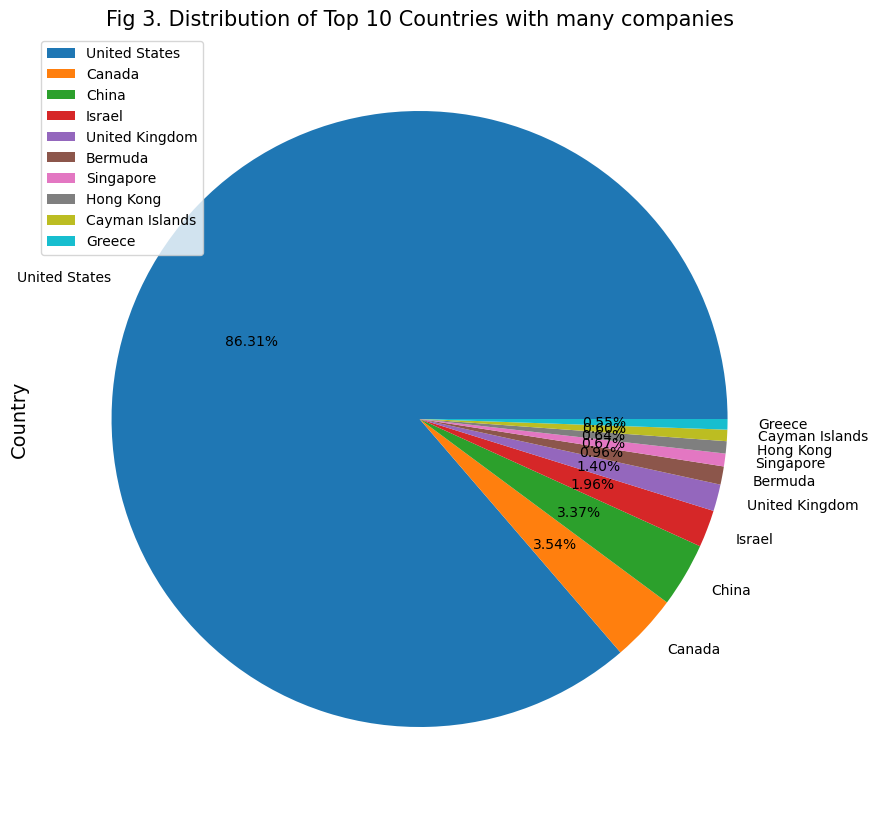

In [23]:
# Country Analysis
country_counts = ticker_df['Country'].value_counts().head(10)
plt.figure(figsize=(16, 10))
country_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Fig 3. Distribution of Top 10 Countries with many companies', fontsize=15)
plt.ylabel('Country', fontsize=14)
plt.legend()
plt.show()

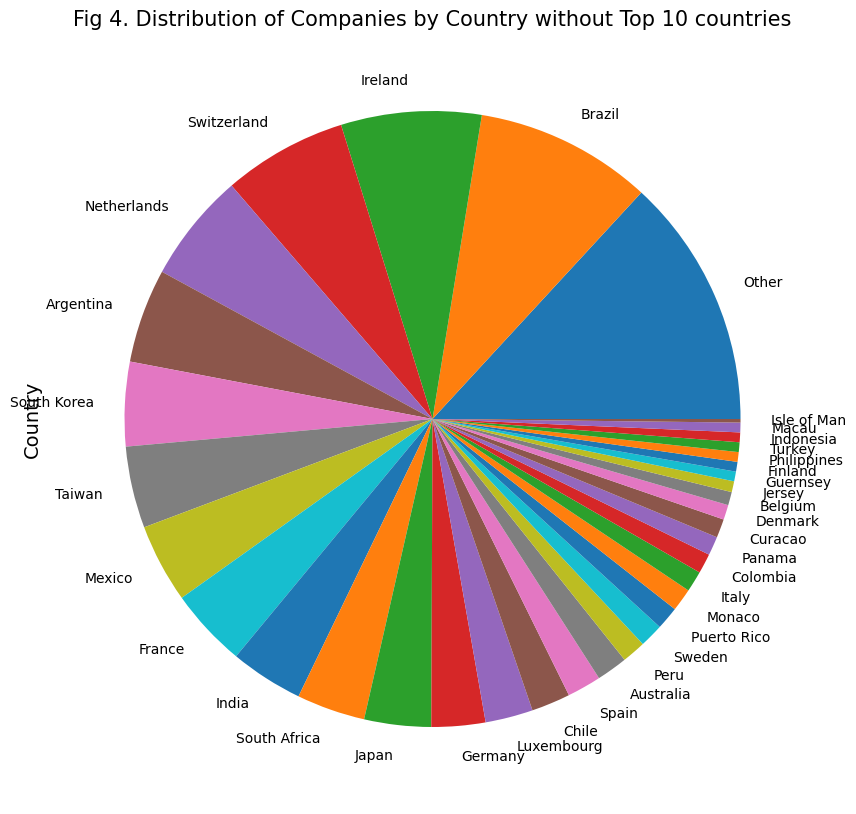

In [24]:
plt.figure(figsize=(14,10))
drop_catgs = ['United States','Canada','China','Israel','United Kingdom','Bermuda','Singapore','Hong Kong','Cayman Islands','Greece']
country_counts1=(merged_df['Country'].value_counts()).drop(drop_catgs)
country_counts1.plot(kind='pie')
plt.title('Fig 4. Distribution of Companies by Country without Top 10 countries', fontsize=15)
plt.ylabel('Country', fontsize=14)
plt.show()

#### Identify relationships between these variables using correlation matrix

/var/folders/28/gj9cb4w95rb4sbjdp44jc_hh0000gn/T/ipykernel_49949/1769519573.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


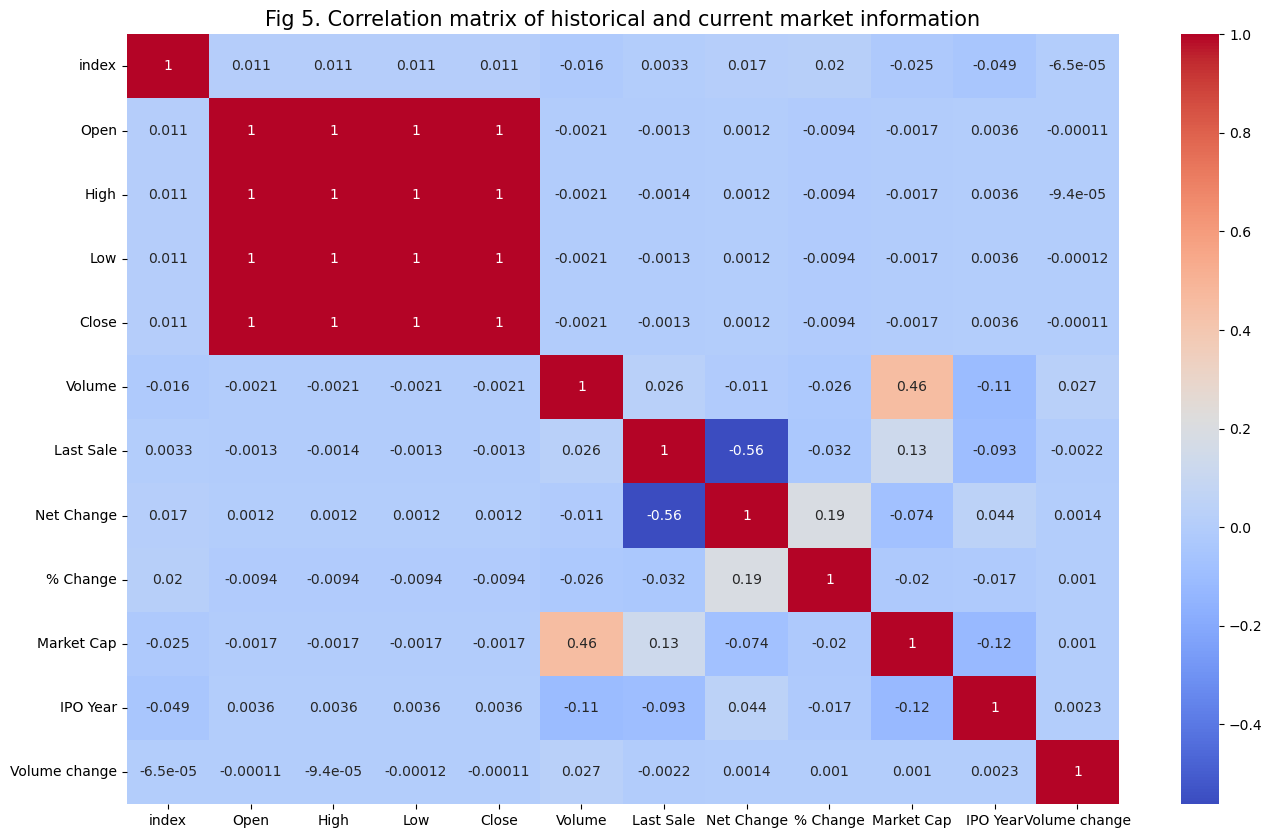

In [25]:
# Correlation Matrix
plt.figure(figsize=(16, 10))
plt.title('Fig 5. Correlation matrix of historical and current market information', fontsize=15)
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Exploring Market Cap Variation and Distribution

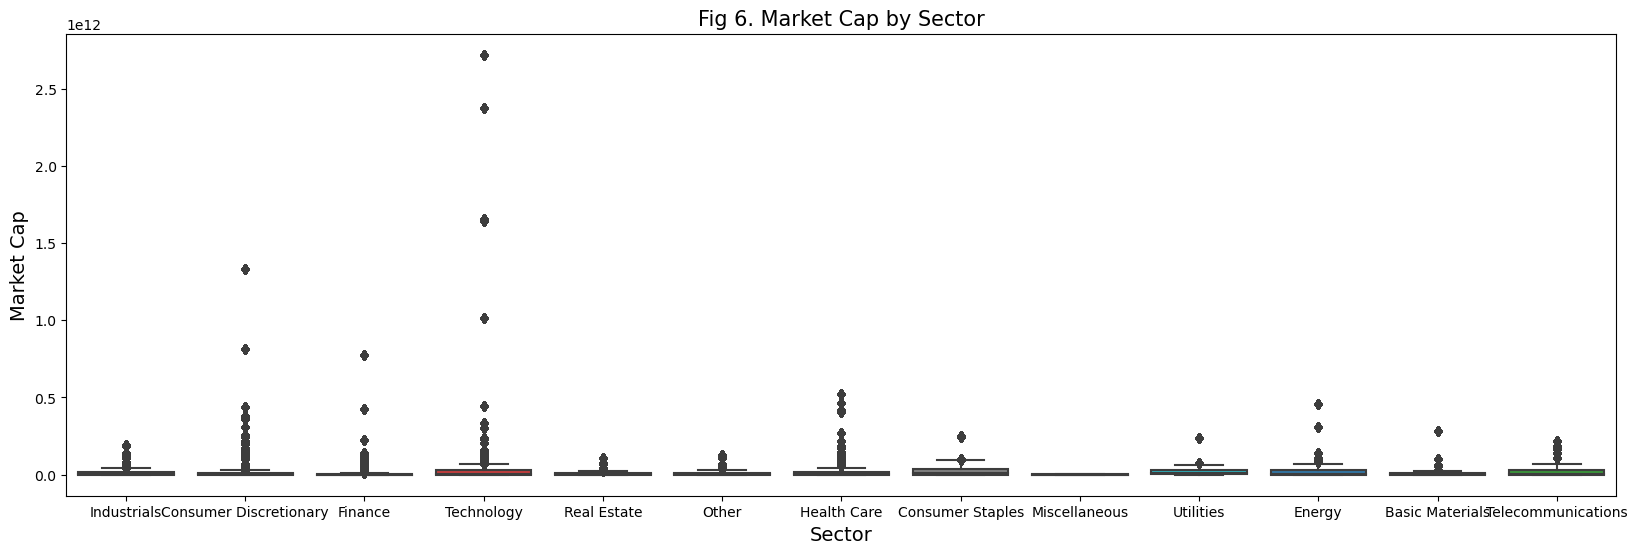

In [26]:
# Market Cap by Sectors
plt.figure(figsize=(20, 6))
palette = sns.color_palette('tab10')
sns.boxplot(x='Sector', y='Market Cap', data=merged_df, palette=palette)
plt.title('Fig 6. Market Cap by Sector', fontsize=15)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Market Cap', fontsize=14)
plt.show()

In [27]:
# Analyze market cap quartiles
# Define the number of quartiles
num_quantiles = 4 
# Calculate the quartile values for market cap
quartiles = merged_df['Market Cap'].quantile([0, 0.25, 0.5, 0.75, 1])
# Create masks for each quartile
mask_1st_quartile = (merged_df['Market Cap'] >= quartiles[0]) & (merged_df['Market Cap'] <= quartiles[0.25])
mask_2nd_quartile = (merged_df['Market Cap'] > quartiles[0.25]) & (merged_df['Market Cap'] <= quartiles[0.5])
mask_3rd_quartile = (merged_df['Market Cap'] > quartiles[0.5]) & (merged_df['Market Cap'] <= quartiles[0.75])
mask_4th_quartile = (merged_df['Market Cap'] > quartiles[0.75])
# Create DataFrames for each quartile
quartile_1 = merged_df[mask_1st_quartile]
quartile_2 = merged_df[mask_2nd_quartile]
quartile_3 = merged_df[mask_3rd_quartile]
quartile_4 = merged_df[mask_4th_quartile]

In [28]:
# Descriptive statistic for market cap quartiles
quartile_1.describe()
quartile_2.describe()
quartile_3.describe()
quartile_4.describe()

,index,Open,High,Low,Close,Volume,Last Sale,Net Change,% Change,Market Cap,IPO Year,Volume change
count,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,2.470912e+06,602620.000000,2.470910e+06
mean,4.798548e+06,4.990781e+01,5.048193e+01,4.931949e+01,4.991098e+01,6.044368e+06,1.664947e+02,-3.030014e+00,-1.576998e+00,1.049257e+11,1997.423419,inf
std,2.915789e+06,2.648278e+02,2.683686e+02,2.612540e+02,2.647061e+02,1.694615e+07,2.962161e+02,1.014429e+01,1.359892e+00,2.415044e+11,11.398464,NaN
min,0.000000e+00,7.910000e-03,7.910000e-03,7.910000e-03,7.910000e-03,0.000000e+00,2.130000e+00,-2.436600e+02,-8.614000e+00,1.475660e+10,1929.000000,-1.000000e+02
25%,2.270322e+06,8.814800e+00,8.940500e+00,8.688800e+00,8.816300e+00,7.016920e+05,5.410000e+01,-3.170000e+00,-2.251000e+00,2.428794e+10,1991.000000,-2.560662e+01
50%,4.726130e+06,2.306100e+01,2.337000e+01,2.274600e+01,2.306700e+01,1.942582e+06,9.940000e+01,-1.470000e+00,-1.548000e+00,4.626952e+10,1998.000000,-1.247196e+00
75%,7.218586e+06,4.342800e+01,4.390600e+01,4.293700e+01,4.343800e+01,5.134657e+06,1.951700e+02,-4.700000e-01,-9.000000e-01,1.051497e+11,2004.000000,3.273700e+01
max,9.904033e+06,1.172024e+04,1.176839e+04,1.140020e+04,1.169713e+04,2.423735e+09,5.888470e+03,2.484000e+01,2.077100e+01,2.719262e+12,2023.000000,inf


#### Understanding Trading Volume Dynamics by Sector

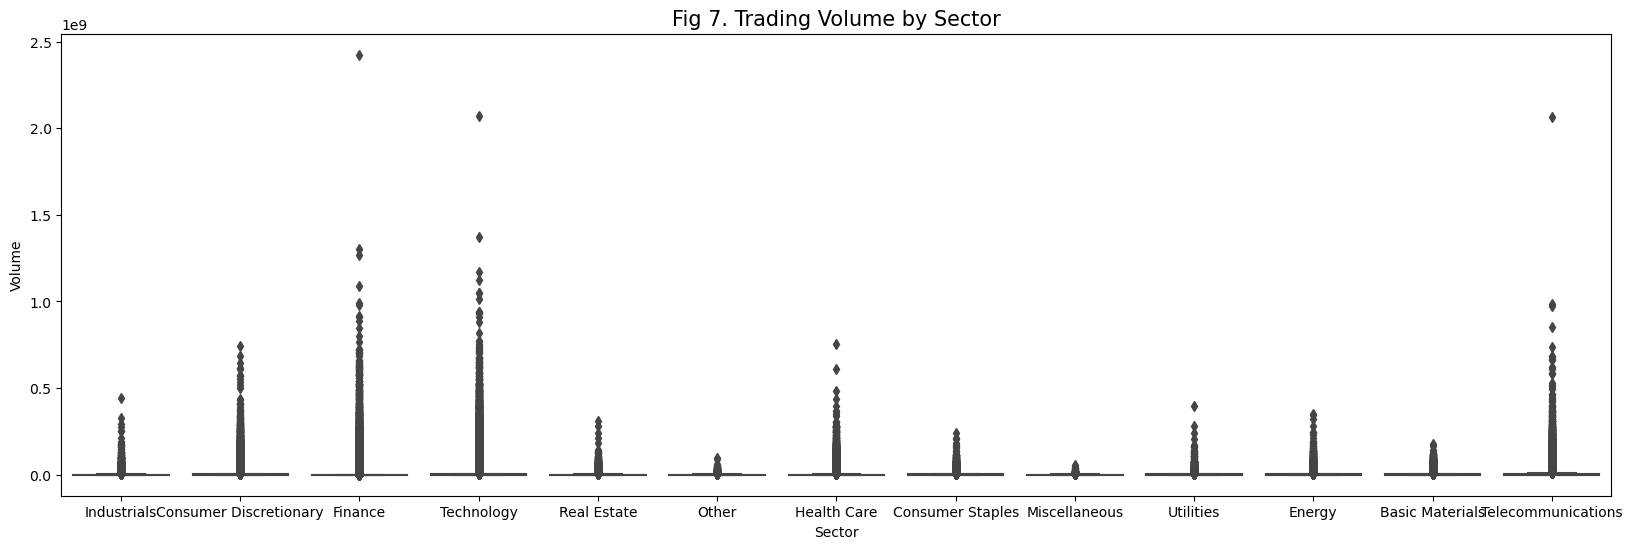

In [29]:
# Trading Volume Analysis
plt.figure(figsize=(20, 6))
palette = sns.color_palette("husl", 8)
sns.boxplot(x='Sector', y='Volume', data=merged_df)
plt.title('Fig 7. Trading Volume by Sector', fontsize=15)
plt.show()

#### Calculate trading volume statistics by sector

In [30]:
# Calculate trading volume statistics by sector
volume_stats = merged_df.groupby('Sector')['Volume'].describe()
print(volume_stats)

                            count          mean           std  min        25%  \
Sector                                                                          
Basic Materials          177969.0  2.586940e+06  6.245851e+06  0.0  110882.00   
Consumer Discretionary  2005530.0  1.890274e+06  6.170528e+06  0.0  100636.00   
Consumer Staples         283852.0  2.321117e+06  4.913215e+06  0.0   73016.25   
Energy                   424438.0  2.543093e+06  5.497325e+06  0.0   75677.50   
Finance                 2501520.0  1.045159e+06  7.589792e+06  0.0   28932.00   
Health Care             1035696.0  1.994126e+06  6.680562e+06  0.0   42412.00   
Industrials             1201689.0  1.243954e+06  2.840295e+06  0.0   94145.00   
Miscellaneous             57900.0  7.064094e+05  1.220867e+06  0.0   52552.00   
Other                    163217.0  9.556735e+05  1.879976e+06  0.0   59762.00   
Real Estate              396968.0  1.235387e+06  3.043812e+06  0.0  104770.50   
Technology              1036

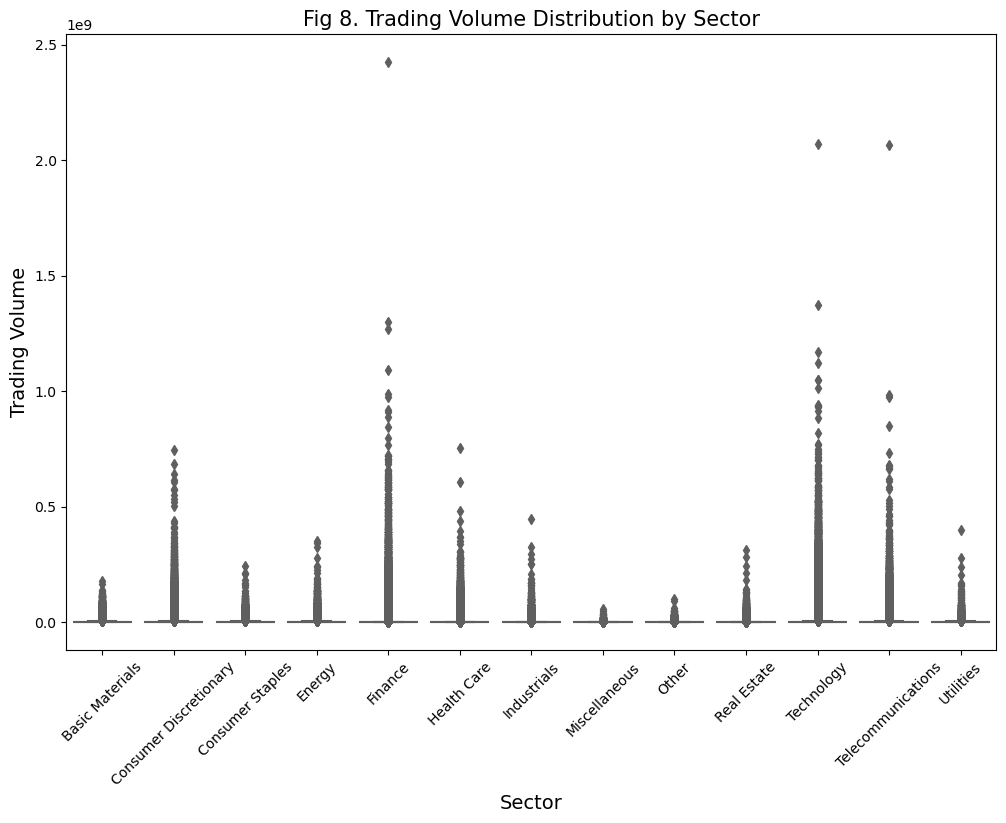

In [31]:
# Create a box plot to visualize trading volume distribution by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sector', y='Volume', data=merged_df, order=volume_stats.index, palette='Set3')
plt.title('Fig 8. Trading Volume Distribution by Sector', fontsize=15)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Trading Volume', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Correlation matrix to analyze relationships between trading volume and other variables

/var/folders/28/gj9cb4w95rb4sbjdp44jc_hh0000gn/T/ipykernel_49949/956217339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


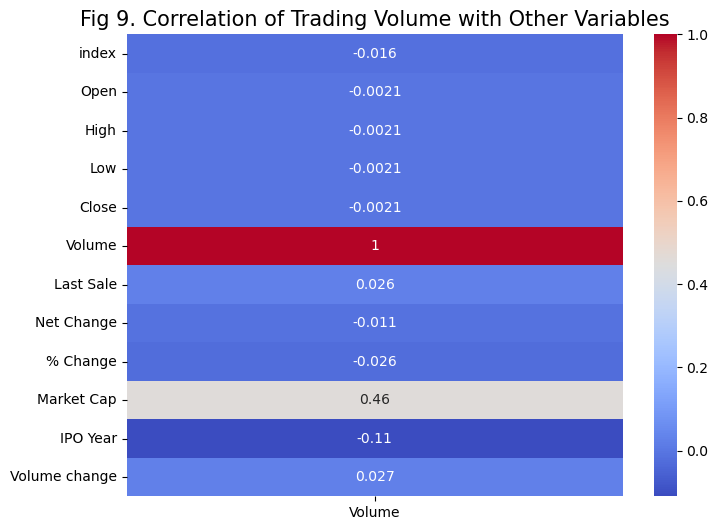

In [32]:
# Correlation matrix to analyze relationships between trading volume and other variables
correlation_matrix = merged_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Volume']], annot=True, cmap='coolwarm')
plt.title('Fig 9. Correlation of Trading Volume with Other Variables', fontsize=15)
plt.show()

#### Time-series plot for sample stock


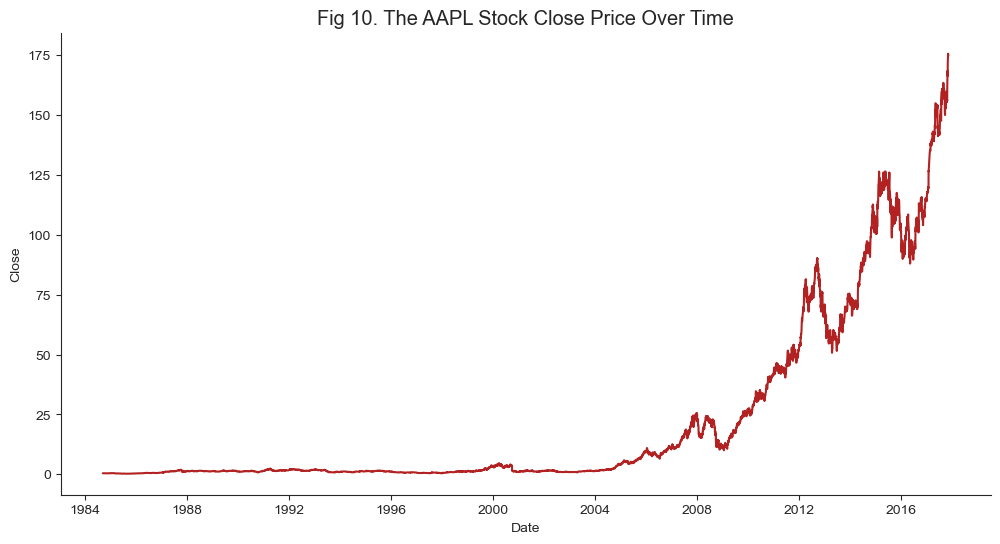

In [33]:
# Filter the data for AAPL stock
aapl_df = merged_df[merged_df['Ticker'] == 'AAPL']
# 'Date' as the index 
aapl_df.set_index('Date', inplace=True)
# Plotting the closing prices
plt.figure(figsize=(12, 6))
sns.set_style('ticks')
sns.lineplot(data=aapl_df, x='Date', y='Close', color='firebrick')
sns.despine()
plt.title('Fig 10. The AAPL Stock Close Price Over Time', size='x-large')
plt.show()

#### Finding top 5 companies performance stocks based on last sale value

In [34]:
top5 = merged_df['Last Sale'].unique()
top5_price = sorted(top5, reverse=True)[:5]
top5_price

[5888.47, 3780.66, 2530.76, 1870.47, 1866.01]

In [35]:
top_companies = []
top_companies.append(merged_df[merged_df['Last Sale'] == 5888.47]['Name'])
top_companies.append(merged_df[merged_df['Last Sale'] == 3780.66]['Name'])
top_companies.append(merged_df[merged_df['Last Sale'] == 2530.76]['Name'])
top_companies.append(merged_df[merged_df['Last Sale'] == 1870.47]['Name'])
top_companies.append(merged_df[merged_df['Last Sale'] == 1866.01]['Name'])
top_companies

[6638174    NVR Inc. Common Stock
 6638175    NVR Inc. Common Stock
 6638176    NVR Inc. Common Stock
 6638177    NVR Inc. Common Stock
 6638178    NVR Inc. Common Stock
                    ...          
 6641370    NVR Inc. Common Stock
 6641371    NVR Inc. Common Stock
 6641372    NVR Inc. Common Stock
 6641373    NVR Inc. Common Stock
 6641374    NVR Inc. Common Stock
 Name: Name, Length: 3201, dtype: object,
 8002170    Seaboard Corporation Common Stock
 8002171    Seaboard Corporation Common Stock
 8002172    Seaboard Corporation Common Stock
 8002173    Seaboard Corporation Common Stock
 8002174    Seaboard Corporation Common Stock
                          ...                
 8007711    Seaboard Corporation Common Stock
 8007712    Seaboard Corporation Common Stock
 8007713    Seaboard Corporation Common Stock
 8007714    Seaboard Corporation Common Stock
 8007715    Seaboard Corporation Common Stock
 Name: Name, Length: 5546, dtype: object,
 881710    AutoZone Inc. Common Stoc

Here we have the graphs of companies having high last sale values, to find their behaviour as we cannot find the behaviour of 3000 companies. We are arranging the companies based on their last sale value and analyzing the high and low ones. This is done to analyze if there is any impact due to external factors such as incidents like war,spread of disease in some particular years. We are confirming if this dataset has any impact due to these factors in all companies.

Text(0.5, 1.0, 'Fig 11. The Stock Price Graph for Top 5 biggest Last sale companies all over the world')

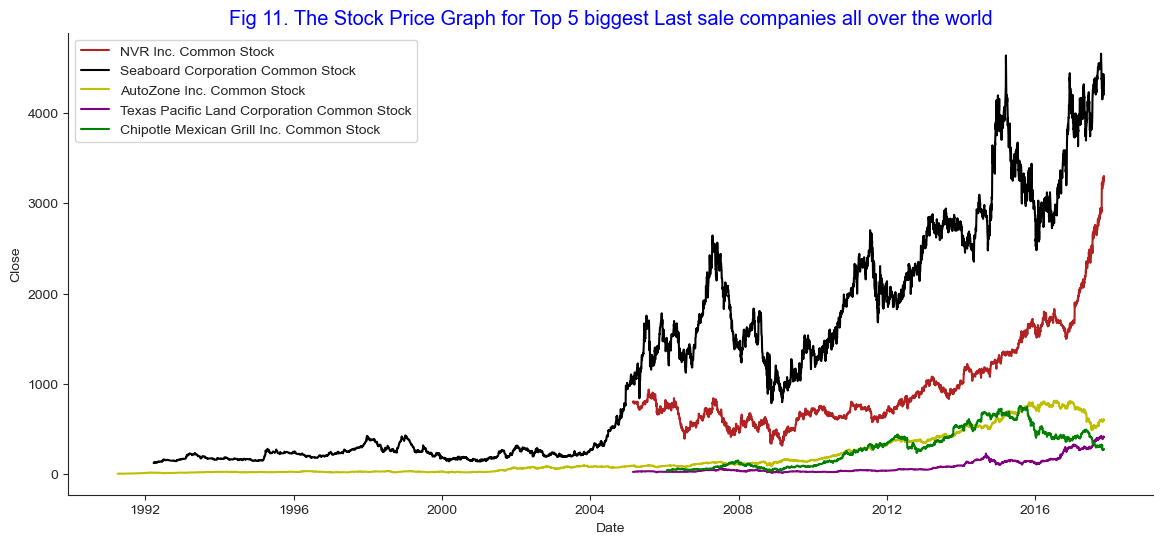

In [36]:
# Plot top 5 companies stock prices
Top1_df = merged_df[merged_df['Name'] == 'NVR Inc. Common Stock']
Top2_df = merged_df[merged_df['Name'] == 'Seaboard Corporation Common Stock']
Top3_df = merged_df[merged_df['Name'] == 'AutoZone Inc. Common Stock']
Top4_df = merged_df[merged_df['Name'] == 'Texas Pacific Land Corporation Common Stock']
Top5_df = merged_df[merged_df['Name'] == 'Chipotle Mexican Grill Inc. Common Stock']

plt.figure(figsize=(14,6))
sns.set_style("ticks")
sns.lineplot(data=Top1_df,x="Date",y='Close',color='firebrick',label='NVR Inc. Common Stock')
sns.lineplot(data=Top2_df,x="Date",y='Close',color='k',label='Seaboard Corporation Common Stock')
sns.lineplot(data=Top3_df,x="Date",y='Close',color='y',label='AutoZone Inc. Common Stock')
sns.lineplot(data=Top4_df,x="Date",y='Close',color='purple',label='Texas Pacific Land Corporation Common Stock')
sns.lineplot(data=Top5_df,x="Date",y='Close',color='g',label='Chipotle Mexican Grill Inc. Common Stock')
sns.despine()
plt.title("Fig 11. The Stock Price Graph for Top 5 biggest Last sale companies all over the world",size='x-large',color='blue')

#### Finding the worst 5 companies performance stock based on last sale value

In [37]:
worst5= merged_df['Last Sale'].unique()
worst_price = sorted(worst5)[:5]
worst_price

[0.01, 0.0401, 0.05, 0.0588, 0.09]

In [38]:
low_perf = []
low_perf.append(merged_df[merged_df['Last Sale'] == 0.01]['Name'])
low_perf.append(merged_df[merged_df['Last Sale'] == 0.0401]['Name'])
low_perf.append(merged_df[merged_df['Last Sale'] == 0.05]['Name'])
low_perf.append(merged_df[merged_df['Last Sale'] == 0.0588]['Name'])
low_perf.append(merged_df[merged_df['Last Sale'] == 0.09]['Name'])
low_perf

[3972473    Global Partner Acquisition Corp II Warrant
 3972474    Global Partner Acquisition Corp II Warrant
 3972475    Global Partner Acquisition Corp II Warrant
 3972476    Global Partner Acquisition Corp II Warrant
 3972477    Global Partner Acquisition Corp II Warrant
                               ...                    
 3972713    Global Partner Acquisition Corp II Warrant
 3972714    Global Partner Acquisition Corp II Warrant
 3972715    Global Partner Acquisition Corp II Warrant
 3972716    Global Partner Acquisition Corp II Warrant
 3972717    Global Partner Acquisition Corp II Warrant
 Name: Name, Length: 245, dtype: object,
 1109124    Crixus BH3 Acquisition Company Warrants
 1109125    Crixus BH3 Acquisition Company Warrants
 1109126    Crixus BH3 Acquisition Company Warrants
 1109127    Crixus BH3 Acquisition Company Warrants
 1109128    Crixus BH3 Acquisition Company Warrants
                             ...                   
 1109519    Crixus BH3 Acquisition Company

Text(0.5, 1.0, 'Fig 12. The Stock Price Graph for Least 5 Last sale value companies all over the world')

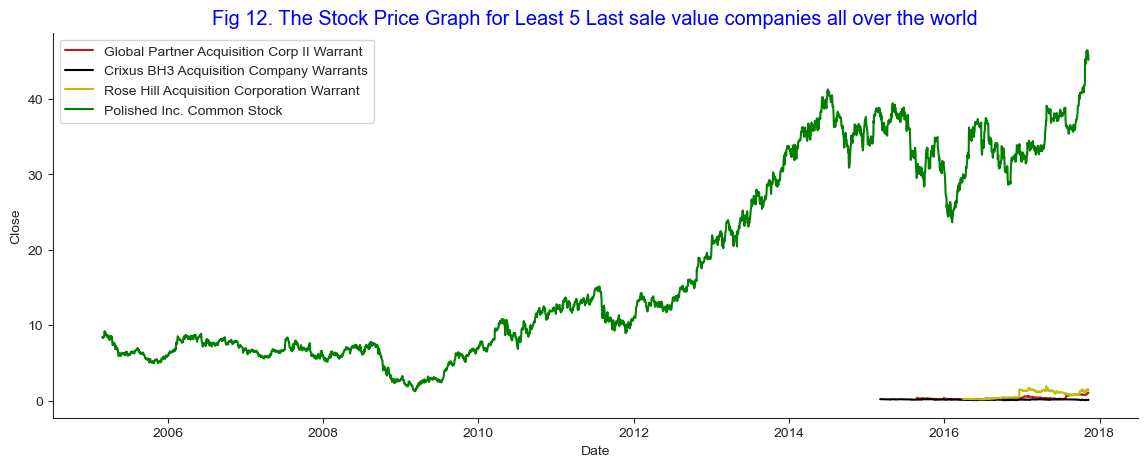

In [39]:
Low1_df = merged_df[merged_df['Name'] == 'Global Partner Acquisition Corp II Warrant']
Low2_df = merged_df[merged_df['Name'] == 'Crixus BH3 Acquisition Company Warrants']
Low3_df = merged_df[merged_df['Name'] == 'Rose Hill Acquisition Corporation Warrant']
Low4_df = merged_df[merged_df['Name'] == 'Oxbridge Re Holdings Limited Warrant expiring']
Low5_df = merged_df[merged_df['Name'] == 'Polished Inc. Common Stock']

plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=Low1_df,x="Date",y='Close',color='firebrick',label='Global Partner Acquisition Corp II Warrant')
sns.lineplot(data=Low2_df,x="Date",y='Close',color='k',label='Crixus BH3 Acquisition Company Warrants')
sns.lineplot(data=Low3_df,x="Date",y='Close',color='y',label='Rose Hill Acquisition Corporation Warrant')
sns.lineplot(data=Low4_df,x="Date",y='Close',color='purple',label='Oxbridge Re Holdings Limited Warrant expiring')
sns.lineplot(data=Low5_df,x="Date",y='Close',color='g',label='Polished Inc. Common Stock')
sns.despine()
plt.title("Fig 12. The Stock Price Graph for Least 5 Last sale value companies all over the world",size='x-large',color='blue')

###### We can find that the dates for the first 4 and the last are unmatched

Text(0.5, 1.0, 'The Stock Price Graph for Least 4 Last sale value companies all over the world')

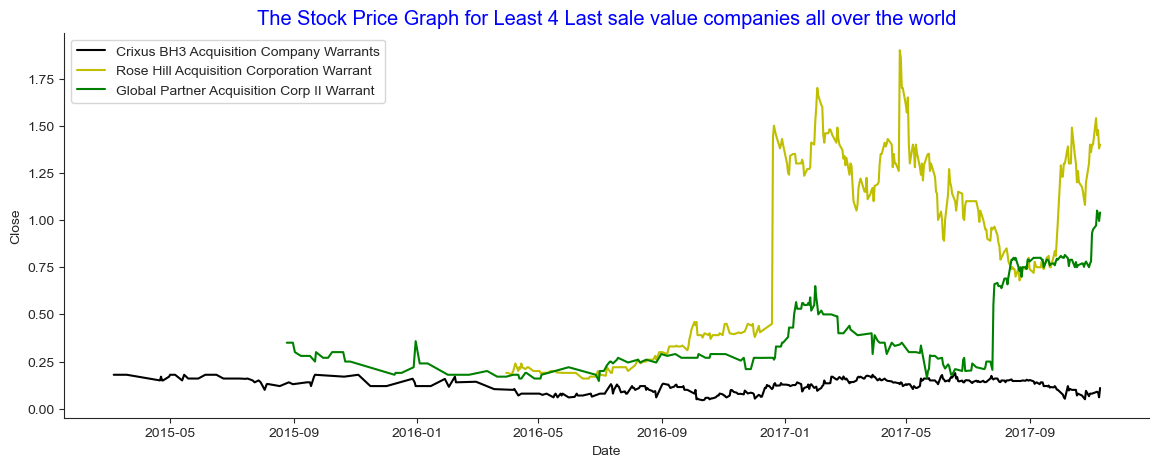

In [40]:
Least1_df = merged_df[merged_df['Name'] == 'Global Partner Acquisition Corp II Warrant']
Least2_df = merged_df[merged_df['Name'] == 'Crixus BH3 Acquisition Company Warrants']
Least3_df = merged_df[merged_df['Name'] == 'Rose Hill Acquisition Corporation Warrant']
Least4_df = merged_df[merged_df['Name'] == 'Oxbridge Re Holdings Limited Warrant expiring']

plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=Least2_df,x="Date",y='Close',color='k',label='Crixus BH3 Acquisition Company Warrants')
sns.lineplot(data=Least3_df,x="Date",y='Close',color='y',label='Rose Hill Acquisition Corporation Warrant')
sns.lineplot(data=Least4_df,x="Date",y='Close',color='purple',label='Oxbridge Re Holdings Limited Warrant expiring')
sns.lineplot(data=Least1_df,x="Date",y='Close',color='g',label='Global Partner Acquisition Corp II Warrant')
sns.despine()
plt.title("The Stock Price Graph for Least 4 Last sale value companies all over the world",size='x-large',color='blue')

# 3. Feature Selection and Engineer:
 The most common way used to predict stock price movement is technical analysis. It forecasts the development of stock prices through an analysis of historical market data to identify the movement direction of stock prices and turning points in the time series. Different types of technical in- dicators, such as stochastic oscillator, moving averages, and relative strength index (RSI), are used in prediction models, and the effectiveness of these input features for future stock market forecasting is studied.

## 3.1. Market Indicators:

Apart from price features and volume, we choose technical indicators that give an indication of the trend, momentum, or volatility of the stock which also includes candlestick patterns, and strategy features. And, we derived them from raw data to feed them to the models.

1. Overlap Indicators: 
- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Kaufman's Adaptive Moving Average (KAMA)

2. Momentum indicators: 
- Average Directional Movement Index (ADX)
- Moving Average Convergence/Divergence (MACD)
- Money Flow Index
- Momentum
- Relative Strength Index (RSI)
- Stochastic oscillator
- Rate of Change (ROC)

3. Volume Indicators: 
- Chaikin A/D Line (AD)
- Chaikin Oscillator
- On Balance Volume (OBV)

4. Volatility Indicators: 
- Average True Range (ATR) 
- Normalized Average True Range
- Bollinger Bands
- Ichimoku Cloud

In [53]:
import ta

# from ta.trend import SMAIndicator, EMAIndicator
# from ta.volatility import BollingerBands, AverageTrueRange
# from ta.momentum import ROCIndicator, StochasticOscillator, RSIIndicator,MomentumIndicator
# from ta.volume import OnBalanceVolumeIndicator
# from ta.trend import MACD
# from ta.trend import IchimokuIndicator

# Define the window values for all technical indicators
window=14

# # Calculate Simple Moving Average (SMA)
sma = SMAIndicator(merged_df['Close'], window=window)
merged_df['SMA'] = sma.sma_indicator()

# Calculate Kaufman's Adaptive Moving Average (KAMA)
kama = ta.momentum.KAMAIndicator(merged_df['Close'], window=window, pow1=2, pow2=30, fillna=True)
merged_df['KAMA'] = kama.kama()

# Calculate Exponential Moving Average (EMA)
ema = ta.trend.EMAIndicator(merged_df['Close'], window=window, fillna=False)
merged_df['EMA'] = ema.ema_indicator()

# Calculate the Directional Movement Index (ADX)
adx = ta.trend.ADXIndicator(merged_df['High'], merged_df['Low'], merged_df['Close'], window, fillna=False)
merged_df['ADX'] = adx.adx()

# Calculate Moving Average Convergence/Divergence (MACD)
fast_window = 12  
slow_window = 26  
signal_window = 9  
macd = ta.trend.MACD(merged_df['Close'], fast_window, slow_window, signal_window)
merged_df['MACD'] = macd.macd()  
merged_df['MACD Signal Line'] = macd.macd_signal()   

# Calculate Money Flow Index (MFI)
mfi = ta.momentum.MFIIndicator(merged_df['High'], merged_df['Low'], merged_df['Close'], merged_df['Volume'], window=window, fillna=False)
merged_df['MFI'] = mfi

# Calculate MomentumIndicator
momentum = ta.momentum.MomentumIndicator(merged_df['Close'], window=window, fillna=False)
merged_df['Momentum'] = momentum.momentum()
merged_df['Momentum_Signal'] = momentum.momentum_diff()

# Calculate Relative Strength Index (RSI)
rsi = RSIIndicator(merged_df['Close'], window=window, fillna=False)
merged_df['RSI'] = rsi.rsi()

# Calculate Stochastic Oscillator
stoch = StochasticOscillator(merged_df['High'], merged_df['Low'], merged_df['Close'], window=window)
merged_df['%K'] = stoch.stoch()
merged_df['%D'] = stoch.stoch_signal()

# Calculate Chaikin A/D Line (AD)
chaikin_ad = ta.volume.ChaikinADIndicator(high=merged_df['High'],low=merged_df['Low'], close=merged_df['Close'], volume=merged_df['Volume'])
merged_df['Chaikin_AD'] = chaikin_ad.ad()
merged_df['Chaikin_ADOsc'] = chaikin_ad.ad_osc()

# Calculate On-Balance Volume (OBV)
obv = OnBalanceVolumeIndicator(merged_df['Close'], merged_df['Volume'])
merged_df['OBV'] = obv.on_balance_volume()

# Calculate Ichimoku Cloud
ichimoku = ta.trend.IchimokuIndicator(high=merged_df['High'],
                                      low=merged_df['Low'],
                                      close=merged_df['Close'],
                                      window1=9, window2=26, window3=52) 
merged_df['tenkan_sen'] = ichimoku.ichimoku_a()
merged_df['kijun_sen'] = ichimoku.ichimoku_b()
merged_df['senkou_span_a'] = ichimoku.ichimoku_a()
merged_df['senkou_span_b'] = ichimoku.ichimoku_b()

# Calculate Rate of Change (ROC)
roc = ROCIndicator(merged_df['Close'], window=window)
merged_df['ROC'] = roc.roc()

# Calculate Average True Range (ATR)
atr = AverageTrueRange(merged_df['High'], merged_df['Low'], merged_df['Close'], window=window)
merged_df['ATR'] = atr.average_true_range()

# Calculate Normalized Average True Range 
merged_df['Normalized_ATR'] = (merged_df['ATR'] / merged_df['Close']) * 100

# Calculate Bollinger Bands
bollinger_bands = ta.volatility.BollingerBands(merged_df['Close'], window=window, window_dev=2)
merged_df['Bollinger_Bands_Middle'] = bollinger_bands.bollinger_mavg()
merged_df['Bollinger_Bands_Upper'] = bollinger_bands.bollinger_hband()
merged_df['Bollinger_Bands_Lower'] = bollinger_bands.bollinger_lband()

In [54]:
merged_df

,index,Date,Open,High,Low,Close,Volume,Ticker,Name,Last Sale,...,IPO Year,Sector,Industry,Volume change,SMA,KAMA,EMA,ADX,MACD,MACD Signal Line
0,1738,1999-11-18,30.713,33.7540,27.0020,29.702,66277506,A,Agilent Technologies Inc. Common Stock,109.73,...,1999.0,Industrials,Electrical Products,NaN,NaN,29.702000,NaN,0.000000,NaN,NaN
1,1739,1999-11-19,28.986,29.0270,26.8720,27.257,16142920,A,Agilent Technologies Inc. Common Stock,109.73,...,1999.0,Industrials,Electrical Products,-75.643441,NaN,28.844125,NaN,0.000000,NaN,NaN
2,1740,1999-11-22,27.886,29.7020,27.0440,29.702,6970266,A,Agilent Technologies Inc. Common Stock,109.73,...,1999.0,Industrials,Electrical Products,-56.821529,NaN,29.167705,NaN,0.000000,NaN,NaN
3,1741,1999-11-23,28.688,29.4460,27.0020,27.002,6332082,A,Agilent Technologies Inc. Common Stock,109.73,...,1999.0,Industrials,Electrical Products,-9.155806,NaN,28.665297,NaN,0.000000,NaN,NaN
4,1742,1999-11-24,27.083,28.3090,27.0020,27.717,5132147,A,Agilent Technologies Inc. Common Stock,109.73,...,1999.0,Industrials,Electrical Products,-18.950086,NaN,28.439680,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889846,9907627,2017-11-06,10.420,11.5400,10.4200,11.190,977948,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,1.34,...,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations,83.999473,9.903571,9.621851,9.949631,32.243400,-0.477242,-0.449771
9889847,9907621,2017-11-07,11.300,11.4200,10.6700,10.830,451210,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,1.34,...,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations,-53.861555,10.006429,9.736522,10.067014,33.379730,-0.506313,-0.461079
9889848,9907622,2017-11-08,10.700,11.0600,10.3500,10.900,336449,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,1.34,...,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations,-25.434055,10.095000,9.832182,10.178079,33.672362,-0.528904,-0.474644
9889849,9907623,2017-11-09,11.000,11.8563,10.9700,11.600,463067,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,1.34,...,2015.0,Health Care,Biotechnology: Pharmaceutical Preparations,37.633638,10.228571,10.044709,10.367668,34.666905,-0.596417,-0.498999


In [ ]:
# Calculate cumulative log returns 
df.ta.log_return(cumulative=True, append=True)
# Calculate cumulative percent returns 
df.ta.percent_return(cumulative=True, append=True)

In [ ]:
merged_df.head()

### 3.2. PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns for PCA
columns_for_pca = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
data_for_pca = merged_df[columns_for_pca]
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)
# Create a PCA model with 10 components 
num_components = 10
pca = PCA(n_components=num_components)
pca.fit(scaled_data)
pca_result = pca.transform(scaled_data)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])
# Concatenate the PCA results with `merged_df`
final_df = pd.concat([merged_df, pca_df], axis=1)

In [ ]:
# Explained variance ratio to understand the importance of each component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# 4. Model Selection:


## 4.1. Choosing a Machine Learning Algorithm

 As described in the literature, SVM and ANN are the most frequently used algorithms for stock market forecasting. A long-term financial market forecasting classification system was proposed by Milosevic et al. [55]. They say that a stock is excellent if its value improves by 10% in a fiscal year; otherwise, it is bad. Eleven fundamental ratios were recovered throughout the model-building process and are used as input features by several algorithms. They found that the random forest had an F score of 0.751 in differentiation using naive Bayes and SVM. Choudhury and Sen [56] trained a back propagation neural network and a multilayer feedforward network to forecast the stock value. A regression value of 0.996 was obtained using their proposed model [6]. 

we used the scaling approach to normalize the characteristics that would be fed to our model. After acquiring a balanced dataset, 75 percent of the dataset was used for training and 25 percent for testing; we divided it into these two groups. As we know, during ML model training there is a chance of overfitting, so technically, during our practical experiment, we adopted the cross-validation technique to avoid overfitting issues [6].



## 4.1.1. Regression models ( linear regression)


## 4.1.2. Time series models (e.g., ARIMA, LSTM)


### a. Autoregressive integrated moving average:

ARIMA is a statistical model which uses time-series data for predicting future trends or better overall understanding of past data. The model's goal is to predict future moves by examining the differences between values in the series instead of through actual values. For a better understanding of the ARIMA model, each of its components is described separately [4]:

* AR (Auto Regression) - when a statistical model uses past data to predict future values, it is called autoregressive. Furthermore, autoregressive models assume that the future will resemble the past.
* I (Integrated) indicates that data values have been replaced with the differenced values of d-order to obtain stationary data.
* MA (Moving Average) means that the regression error is a linear combination of past errors.


### b. LSTM:
The noisy stock market data is fed into the DAE, which undergoes encoding and decoding. The DAE used in this work is unsupervised learning or self-supervised learning since it does not require human intervention such as data labeling (Skansi, 2018). The encoder transforms the input to a lower dimensional representation, and a decoder reconstructs the original data from the lower dimensional representation. Therefore the objective is to restore the initial data with the minimum amount of information loss. A DAE with two symmetrical deep belief networks having an encoding half and the second with a decoding half is used here. In the encoder part, the input data is compressed to reduce the relevant information, which results in significant size reduction. The decoder produces the reverse operation of the encoder, i.e., the uncompressed data is created as a reconstruction of the input as accurately as possible.

The DAE we have used in modeling can be diagrammatically represented as shown in Fig. 2, which consists of an input layer, encoding deep belief network, compressed feature vector, decoding deep belief network, and an output layer.

The processed data from the DAE, along with sentiment value, is provided to the LSTM network. LSTM is used as it can capture long-term dependencies, thereby eliminating the problem of vanishing gradient (Hochreiter, 1998). LSTM helps in feature extraction from data using its multi-layered architecture. The number of neurons in different layers and the number of layers impact the performance. 


The inputs provided to the LSTM are cell states and hidden states of time-step t − 1. The outputs of the LSTM are cell states and hidden states of time-step t. Forget gate dictates the extent of information that can be input into the LSTM unit. The input gate controls the extent of information that can be learned. Tanh is the activation layer that maps inputs into cell states. Output gate controls the information that can be output as a hidden state for the next time-step. Tanh activation layer activates the information of the cell state.


The processed data from the autoencoder is provided to the LSTM network. 


LSTM structure.
Layer (type)	Output shape	Param #
lstm_5 (LSTM)	(None, 2, 100)	42000
lstm_6 (LSTM)	(None, 256)	365568
dropout_4 (Dropout)	(None, 256)	0
dense_3 (Dense)	(None, 4)	1028
Total params: 408,596
Trainable params: 408,596
Non-trainable params: 0


LSTM helps in extracting features from data using its multi-layered architecture. The architecture has two connected layers, and in the output layer, we have used the sigmoid activation function. In between the second layer of LSTM and fully connected layers, we have a dropout rate of 0.2. The dataset is iterated over 100 epochs with a batch size of 32. The model is further analyzed for performance metrics described in the literature review [7].

## 4.1.3. Ensemble models (SVM, AdaBoost, XGBoost, GBDT)


Many ensemble approaches have been developed in machine learning platforms to improve predicting performance and decrease bias and variance trade-offs [64]. The most often used algorithms for machine learning-based ensemble learning include AdaBoost [65], XGBoost [66], and GBDT [67]. In Nobre and Neves [66], an XGBoost-based binary classifier is introduced. The results demonstrate that the framework may provide greater average returns.

Employing random forest and XGBoost classifiers, researchers demonstrated that hybrid models perform much better with the right set of indicators as input features for a classifier. Ecer et al. [63] claim that ensemble machine learning approaches are superior to individual machine learning models in terms of performance. 

## 4.1.4. Deep Learning (ANN, CNN, RNN)

deep learning algorithms, such as deep neural network (DNN), convolution neural network (CNN) and recurrent neural network (RNN) can extract potential features of highly unstructured data and explore complex intrinsic patterns of stock price movements based on time series data, and they have been used to predict stock market trends (Hu et al., 2021; Liu et al., 2021a; Lu and Lu, 2021). Among all RNN-based models, long short-term memory (LSTM) could be the most effective model for time series prediction. LSTM uses a set of memory cells with gate structure to replace hidden neurons of RNN. As such, through the gate structure feature, the information is retained and persistently updated in the following training iterations. So, it has the advantage of solving the gradient explosion and gradient disappearance problems in neural network algorithms. Several articles have shown that it outperforms RNNs and traditional machine learning algorithms in stock predictions based on time series data (Liu et al., 2021; Brogaard and Zareei, 2022).

## 4.2. Model Training
1. Splitting data into training and testing sets
2. Hyperparameter tuning


## 4.3. Model Evaluation
1. Performance metrics 
2. Backtesting historical recommendations


# 5. Sentiment Analysis:
Out of all the possible factors affecting the prices, it all comes down to the investors and their willingness to invest money. To extract the emotion of the investors, sentiment analysis is used. Existing studies have shown that there is a correlation between financial news headlines and stock market price movement.




* Data source: https://www.kaggle.com/datasets/kazanova/sentiment140

* Research: https://www.scirp.org/journal/paperinformation.aspx?paperid=104142

The goal of this session is to go beyond the numerical data of stock prices and use textual data as an additional resource of information about the stock market in making predictions. Moreover, various state-of-the-art NLP models ranging from baseline models based on convolutional and recurrent neural networks to the most recent Bidirectional Encoder Representations from Transformers (BERT)-based models are designed, implemented and tested. Here, BERT is a transformer-based machine learning technique for NLP. Nevertheless, conventional statistical models for technical analysis are implemented as a benchmark [5].

BERT – bidirectional encoder representations from transformers
BERT is a state-of-the-art language model for NLP tasks that is based on the original Transformer architecture (Vaswani et al., 2017). Transformer architecture was designed to resolve sequence-to-sequence tasks while successfully dealing with long-range dependencies. Its architecture consists of the encoder which reads input text and the decoder which generates the output sequence.
Unlike recurrent neural networks, the Transformer model is based on an attention mechanism that tries to understand relations between words. In other words, the attention mechanism decides which parts of the sequence are important [5]. 

# References:

[1]  Mohan, A., Soni, T. K., Vamshisai, P., & Sateesh, B. (2022). A deep Q network framework on stock price prediction. International Journal of Health Sciences,6(S5), 3050–3061. https://doi.org/10.53730/ijhs.v6nS5.9318

[4]  Kotu, V. and Deshpande, B. (2019), “Chapter 12 – “Time Series Forecasting”, in Kotu, V. and Deshpande, B. (Eds), Data Science, 2nd ed., Morgan Kaufmann, Cambridge, MA, pp. 395-445.


[5]  Puh, K. and Bagić Babac, M. (2023), "Predicting stock market using natural language processing", American Journal of Business, Vol. 38 No. 2, pp. 41-61. https://doi.org/10.1108/AJB-08-2022-0124

[6]  Dushmanta Kumar Padhi, Neelamadhab Padhy, Akash Kumar Bhoi, Jana Shafi, Seid Hassen Yesuf, "An Intelligent Fusion Model with Portfolio Selection and Machine Learning for Stock Market Prediction", Computational Intelligence and Neuroscience, vol. 2022, Article ID 7588303, 18 pages, 2022. https://doi.org/10.1155/2022/7588303

[7] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9748829/